## What are the most demanded skills for the top 3 most popular data roles?

### Import Libraries and Data

In [2]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
df=pd.read_csv('C:/Users/Admin/Downloads/job_postings.csv')

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

### Filter Data for India

In [3]:
df_IND=df[df['job_country']=='India']

In [4]:
# explode skills
df_skills=df_IND.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
36,"Capital Market Data Analyst- Part time, Remote",sql
36,"Capital Market Data Analyst- Part time, Remote",python
36,"Capital Market Data Analyst- Part time, Remote",bigquery
36,"Capital Market Data Analyst- Part time, Remote",excel
36,"Capital Market Data Analyst- Part time, Remote",looker
...,...,...
478882,Tableau engineer,oracle
478882,Tableau engineer,databricks
478882,Tableau engineer,tableau
478882,Tableau engineer,excel


### Count Skills per Job Title

In [5]:
# group skills and job title and count number of occurences
df_skills_count=df_skills.groupby(['job_skills', 'job_title_short']).size()

# name the column as count
df_skills_count=df_skills_count.reset_index(name='skill_count')

# sort values in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1300,sql,Data Engineer,10571
1024,python,Data Engineer,9577
98,aws,Data Engineer,6399
1025,python,Data Scientist,5943
108,azure,Data Engineer,5875
...,...,...,...
710,mariadb,Data Analyst,1
712,mariadb,Data Scientist,1
12,airtable,Senior Data Analyst,1
1587,zoom,Senior Data Scientist,1


### List of Top 3 Roles

In [6]:
job_titles=df_skills_count['job_title_short'].unique().tolist()

job_titles=sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plot Skill Counts

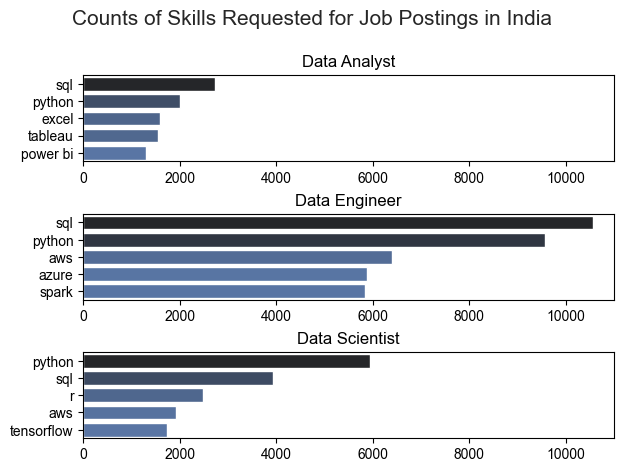

In [7]:
fig, ax=plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 11000)

fig.suptitle('Counts of Skills Requested for Job Postings in India', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

### Convert Counts to Percentage

In [8]:
df_job_title_count=df_IND['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,15487
1,Data Scientist,8355
2,Data Analyst,4753
3,Senior Data Engineer,3515
4,Business Analyst,1795
5,Senior Data Scientist,1786
6,Software Engineer,1582
7,Senior Data Analyst,867
8,Machine Learning Engineer,740
9,Cloud Engineer,383


In [9]:
df_skills_perc=pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skills_percent']=(df_skills_perc['skill_count']/df_skills_perc['jobs_total'])*100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,sql,Data Engineer,10571,15487,68.257248
1,python,Data Engineer,9577,15487,61.838962
2,aws,Data Engineer,6399,15487,41.318525
3,python,Data Scientist,5943,8355,71.131059
4,azure,Data Engineer,5875,15487,37.935042
...,...,...,...,...,...
1584,mariadb,Data Analyst,1,4753,0.021039
1585,mariadb,Data Scientist,1,8355,0.011969
1586,airtable,Senior Data Analyst,1,867,0.115340
1587,zoom,Senior Data Scientist,1,1786,0.055991


### Plot Percentage Count

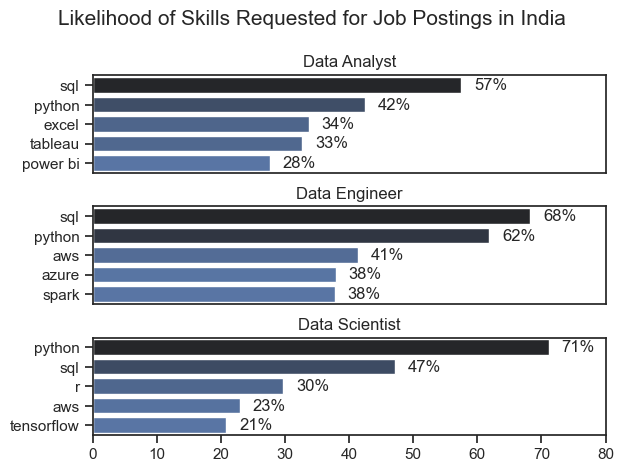

In [ ]:
fig, ax=plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 80)

    # label percentage on the bars
    for n, v in enumerate(df_plot['skills_percent']):   
        ax[i].text(v+2, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested for Job Postings in India', fontsize=15)
fig.tight_layout(h_pad=0.8)
plt.show()